In [1]:
from __future__ import absolute_import

import math
import os
import sys
import torch
import numpy as np
import kuramoto
import data_utils
import matplotlib.pyplot as plt
import h5py
from scipy.interpolate import CubicSpline

random_seed = 42

In [2]:
# load data (matlab file)
data_path = '.../L22_Ninput64.mat'
data_dic = h5py.File(data_path,'r')
data = np.array(data_dic['uu'])
print(data.shape)

data = (data - np.min(data)) / (np.max(data) - np.min(data))

(64, 24001)


(64, 2000)


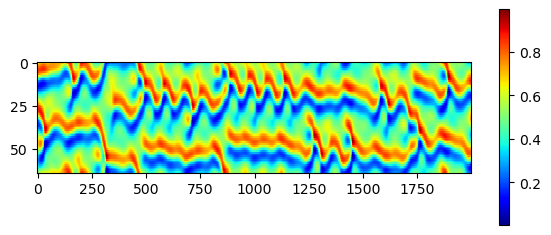

In [4]:
u_test = data[:,10000:12000]
print(u_test.shape)

fig = plt.figure(5, figsize=(7,7))
im = plt.imshow(u_test, cmap=plt.get_cmap('jet'), interpolation='none', aspect = 8)
fig.colorbar(im, shrink=0.4)

In [5]:
# 4 --> 60
N = 64
M = 4 # measurable variables
variable_spacing = math.ceil(N/M)
print('input variable space: ', variable_spacing)

slice_idx = np.arange(0, N, variable_spacing, dtype=int)
print(slice_idx)
xs = np.arange(0, N+1, dtype=int)

input variable space:  16
[ 0 16 32 48]


In [6]:
u_in = u_test[::variable_spacing,:]
print(u_in.shape)
u_out = np.delete(u_test, np.s_[::variable_spacing], axis=0)
print(u_out.shape)

(4, 2000)
(60, 2000)


In [7]:
# for periodic boundary condition, set y[0] == y[-1]
u_con = u_in[0, :][np.newaxis, :]
u_test_in = np.concatenate((u_in, u_con), axis=0)
print(u_test_in.shape)

(5, 2000)


[ 0 16 32 48 64]
(64, 2000)


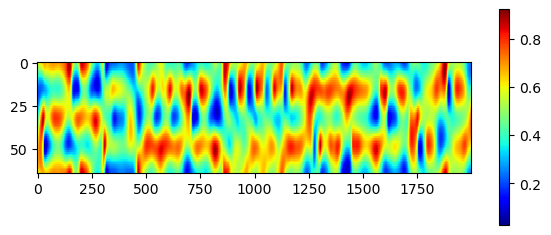

In [9]:
slice_idx = np.arange(0, N, variable_spacing, dtype=int)
slice_idx = np.append(slice_idx, N)
print(slice_idx)
spline_u_test_in = CubicSpline(slice_idx, u_test_in.T, axis=1, bc_type='periodic', extrapolate=False)
xs = np.arange(0, N+1, dtype=int)
u_test_in_spline = spline_u_test_in(xs)
u_test_spline = u_test_in_spline[:, :N].T
print(u_test_spline.shape)

fig = plt.figure(4, figsize=(7,7))
im = plt.imshow(u_test_spline, cmap=plt.get_cmap('jet'), interpolation='none', aspect = 8)
fig.colorbar(im, shrink=0.4)

In [10]:
corr = np.corrcoef(u_test.flatten(), u_test_spline.flatten())[0, 1]
print(corr)

0.36679465468895583


In [11]:
# 5 --> 59
M = 5 # measurable variables
variable_spacing = math.ceil(N/M)
print('input variable space: ', variable_spacing)

slice_idx = np.arange(0, N, variable_spacing, dtype=int)
print(slice_idx)

input variable space:  13
[ 0 13 26 39 52]


In [12]:
u_in = u_test[::variable_spacing,:]
print(u_in.shape)
u_out = np.delete(u_test, np.s_[::variable_spacing], axis=0)
print(u_out.shape)

(5, 2000)
(59, 2000)


In [13]:
# for periodic boundary condition, set y[0] == y[-1]
u_con = u_in[0, :][np.newaxis, :]
u_test_in = np.concatenate((u_in, u_con), axis=0)
print(u_test_in.shape)

(6, 2000)


[ 0 13 26 39 52 64]
(64, 2000)


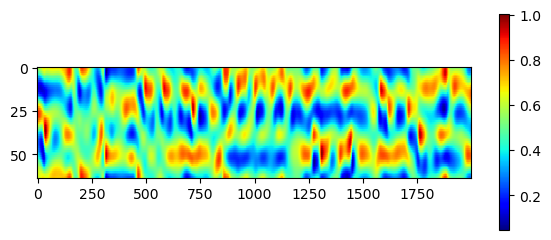

In [14]:
slice_idx = np.arange(0, N, variable_spacing, dtype=int)
slice_idx = np.append(slice_idx, N)
print(slice_idx)
spline_u_test_in = CubicSpline(slice_idx, u_test_in.T, axis=1, bc_type='periodic', extrapolate=False)
xs = np.arange(0, N+1, dtype=int)
u_test_in_spline = spline_u_test_in(xs)
u_test_spline = u_test_in_spline[:, :N].T
print(u_test_spline.shape)

fig = plt.figure(4, figsize=(7,7))
im = plt.imshow(u_test_spline, cmap=plt.get_cmap('jet'), interpolation='none', aspect = 8)
fig.colorbar(im, shrink=0.4)

In [15]:
corr = np.corrcoef(u_test.flatten(), u_test_spline.flatten())[0, 1]
print(corr)

0.5665366286911575


In [16]:
# 6 --> 58
M = 6 # measurable variables
variable_spacing = math.ceil(N/M)
print('input variable space: ', variable_spacing)

slice_idx = np.arange(0, N, variable_spacing, dtype=int)
print(slice_idx)

input variable space:  11
[ 0 11 22 33 44 55]


In [17]:
u_in = u_test[::variable_spacing,:]
print(u_in.shape)
u_out = np.delete(u_test, np.s_[::variable_spacing], axis=0)
print(u_out.shape)

(6, 2000)
(58, 2000)


In [18]:
# for periodic boundary condition, set y[0] == y[-1]
u_con = u_in[0, :][np.newaxis, :]
u_test_in = np.concatenate((u_in, u_con), axis=0)
print(u_test_in.shape)

(7, 2000)


[ 0 11 22 33 44 55 64]
(64, 2000)


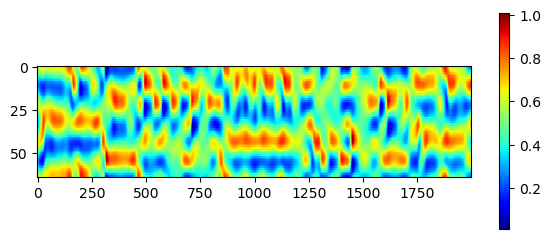

In [19]:
slice_idx = np.arange(0, N, variable_spacing, dtype=int)
slice_idx = np.append(slice_idx, N)
print(slice_idx)
spline_u_test_in = CubicSpline(slice_idx, u_test_in.T, axis=1, bc_type='periodic', extrapolate=False)
xs = np.arange(0, N+1, dtype=int)
u_test_in_spline = spline_u_test_in(xs)
u_test_spline = u_test_in_spline[:, :N].T
print(u_test_spline.shape)

fig = plt.figure(4, figsize=(7,7))
im = plt.imshow(u_test_spline, cmap=plt.get_cmap('jet'), interpolation='none', aspect = 8)
fig.colorbar(im, shrink=0.4)

In [20]:
corr = np.corrcoef(u_test.flatten(), u_test_spline.flatten())[0, 1]
print(corr)

0.7435682480808775


In [21]:
# 7 --> 57
M = 7 # measurable variables
variable_spacing = math.ceil(N/M)
print('input variable space: ', variable_spacing)

slice_idx = np.arange(0, N, variable_spacing, dtype=int)
print(slice_idx)

input variable space:  10
[ 0 10 20 30 40 50 60]


In [22]:
u_in = u_test[::variable_spacing,:]
print(u_in.shape)
u_out = np.delete(u_test, np.s_[::variable_spacing], axis=0)
print(u_out.shape)

(7, 2000)
(57, 2000)


In [23]:
# for periodic boundary condition, set y[0] == y[-1]
u_con = u_in[0, :][np.newaxis, :]
u_test_in = np.concatenate((u_in, u_con), axis=0)
print(u_test_in.shape)

(8, 2000)


[ 0 10 20 30 40 50 60 64]
(64, 2000)


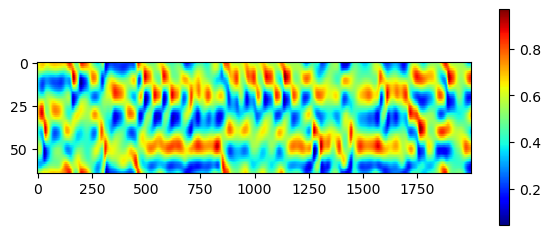

In [24]:
slice_idx = np.arange(0, N, variable_spacing, dtype=int)
slice_idx = np.append(slice_idx, N)
print(slice_idx)
spline_u_test_in = CubicSpline(slice_idx, u_test_in.T, axis=1, bc_type='periodic', extrapolate=False)
xs = np.arange(0, N+1, dtype=int)
u_test_in_spline = spline_u_test_in(xs)
u_test_spline = u_test_in_spline[:, :N].T
print(u_test_spline.shape)

fig = plt.figure(4, figsize=(7,7))
im = plt.imshow(u_test_spline, cmap=plt.get_cmap('jet'), interpolation='none', aspect = 8)
fig.colorbar(im, shrink=0.4)

In [25]:
corr = np.corrcoef(u_test.flatten(), u_test_spline.flatten())[0, 1]
print(corr)

0.8050869715897929


In [26]:
# 8 --> 56
M = 8 # measurable variables
variable_spacing = math.ceil(N/M)
print('input variable space: ', variable_spacing)

slice_idx = np.arange(0, N, variable_spacing, dtype=int)
print(slice_idx)

input variable space:  8
[ 0  8 16 24 32 40 48 56]


In [27]:
u_in = u_test[::variable_spacing,:]
print(u_in.shape)
u_out = np.delete(u_test, np.s_[::variable_spacing], axis=0)
print(u_out.shape)

(8, 2000)
(56, 2000)


In [28]:
# for periodic boundary condition, set y[0] == y[-1]
u_con = u_in[0, :][np.newaxis, :]
u_test_in = np.concatenate((u_in, u_con), axis=0)
print(u_test_in.shape)

(9, 2000)


[ 0  8 16 24 32 40 48 56 64]
(64, 2000)


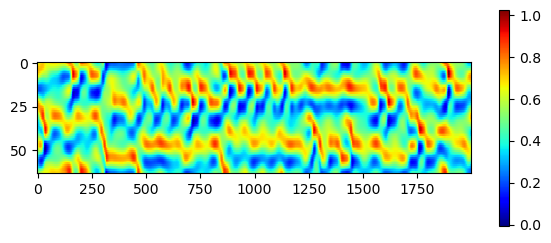

In [29]:
slice_idx = np.arange(0, N, variable_spacing, dtype=int)
slice_idx = np.append(slice_idx, N)
print(slice_idx)
spline_u_test_in = CubicSpline(slice_idx, u_test_in.T, axis=1, bc_type='periodic', extrapolate=False)
xs = np.arange(0, N+1, dtype=int)
u_test_in_spline = spline_u_test_in(xs)
u_test_spline = u_test_in_spline[:, :N].T
print(u_test_spline.shape)

fig = plt.figure(4, figsize=(7,7))
im = plt.imshow(u_test_spline, cmap=plt.get_cmap('jet'), interpolation='none', aspect = 8)
fig.colorbar(im, shrink=0.4)

In [30]:
corr = np.corrcoef(u_test.flatten(), u_test_spline.flatten())[0, 1]
print(corr)

0.9283152156575547
